## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9834112	total: 70.2ms	remaining: 1m 10s
1:	learn: 0.9650583	total: 71.3ms	remaining: 35.6s
2:	learn: 0.9442617	total: 72.2ms	remaining: 24s
3:	learn: 0.9296694	total: 73.3ms	remaining: 18.2s
4:	learn: 0.9123035	total: 74.3ms	remaining: 14.8s
5:	learn: 0.8952953	total: 75.4ms	remaining: 12.5s
6:	learn: 0.8783240	total: 76.4ms	remaining: 10.8s
7:	learn: 0.8627632	total: 77.3ms	remaining: 9.58s
8:	learn: 0.8473351	total: 78.1ms	remaining: 8.6s
9:	learn: 0.8330231	total: 79ms	remaining: 7.82s
10:	learn: 0.8193633	total: 79.9ms	remaining: 7.18s
11:	learn: 0.8057553	total: 80.7ms	remaining: 6.64s
12:	learn: 0.7908470	total: 81.6ms	remaining: 6.19s
13:	learn: 0.7765182	total: 82.4ms	remaining: 5.8s
14:	learn: 0.7642374	total: 83.1ms	remaining: 5.46s
15:	learn: 0.7508307	total: 83.9ms	remaining: 5.16s
16:	learn: 0.7395191	total: 84.7ms	remaining: 4.89s
17:	learn: 0.7270593	total: 85.5ms	remaining: 4.66s
18:	learn: 0.7149032	total: 86.2ms	remaining: 4.4

47:	learn: 0.4861832	total: 109ms	remaining: 2.17s
48:	learn: 0.4805127	total: 110ms	remaining: 2.14s
49:	learn: 0.4745999	total: 111ms	remaining: 2.11s
50:	learn: 0.4690516	total: 112ms	remaining: 2.08s
51:	learn: 0.4645921	total: 113ms	remaining: 2.06s
52:	learn: 0.4590881	total: 114ms	remaining: 2.03s
53:	learn: 0.4553478	total: 114ms	remaining: 2s
54:	learn: 0.4494132	total: 115ms	remaining: 1.98s
55:	learn: 0.4456590	total: 116ms	remaining: 1.95s
56:	learn: 0.4410993	total: 117ms	remaining: 1.93s
57:	learn: 0.4366314	total: 117ms	remaining: 1.91s
58:	learn: 0.4332097	total: 118ms	remaining: 1.89s
59:	learn: 0.4292625	total: 119ms	remaining: 1.87s
60:	learn: 0.4252947	total: 120ms	remaining: 1.85s
61:	learn: 0.4206600	total: 121ms	remaining: 1.83s
62:	learn: 0.4177167	total: 122ms	remaining: 1.81s
63:	learn: 0.4139603	total: 123ms	remaining: 1.79s
64:	learn: 0.4103285	total: 123ms	remaining: 1.77s
65:	learn: 0.4063430	total: 124ms	remaining: 1.76s
66:	learn: 0.4025443	total: 125ms	

141:	learn: 0.2693418	total: 193ms	remaining: 1.17s
142:	learn: 0.2685860	total: 194ms	remaining: 1.16s
143:	learn: 0.2676811	total: 195ms	remaining: 1.16s
144:	learn: 0.2668500	total: 196ms	remaining: 1.16s
145:	learn: 0.2660823	total: 197ms	remaining: 1.15s
146:	learn: 0.2653789	total: 198ms	remaining: 1.15s
147:	learn: 0.2644818	total: 198ms	remaining: 1.14s
148:	learn: 0.2635622	total: 199ms	remaining: 1.14s
149:	learn: 0.2629639	total: 200ms	remaining: 1.13s
150:	learn: 0.2619740	total: 201ms	remaining: 1.13s
151:	learn: 0.2612251	total: 202ms	remaining: 1.13s
152:	learn: 0.2605577	total: 203ms	remaining: 1.12s
153:	learn: 0.2598352	total: 203ms	remaining: 1.12s
154:	learn: 0.2584702	total: 204ms	remaining: 1.11s
155:	learn: 0.2574391	total: 205ms	remaining: 1.11s
156:	learn: 0.2565289	total: 206ms	remaining: 1.11s
157:	learn: 0.2555557	total: 207ms	remaining: 1.1s
158:	learn: 0.2543390	total: 208ms	remaining: 1.1s
159:	learn: 0.2535892	total: 208ms	remaining: 1.09s
160:	learn: 0.

268:	learn: 0.1891240	total: 299ms	remaining: 814ms
269:	learn: 0.1884553	total: 300ms	remaining: 812ms
270:	learn: 0.1882190	total: 301ms	remaining: 810ms
271:	learn: 0.1877497	total: 302ms	remaining: 809ms
272:	learn: 0.1873555	total: 303ms	remaining: 807ms
273:	learn: 0.1870745	total: 304ms	remaining: 805ms
274:	learn: 0.1866952	total: 304ms	remaining: 803ms
275:	learn: 0.1860620	total: 305ms	remaining: 801ms
276:	learn: 0.1858056	total: 306ms	remaining: 799ms
277:	learn: 0.1853718	total: 307ms	remaining: 797ms
278:	learn: 0.1849844	total: 308ms	remaining: 795ms
279:	learn: 0.1844956	total: 308ms	remaining: 793ms
280:	learn: 0.1841965	total: 310ms	remaining: 792ms
281:	learn: 0.1837437	total: 310ms	remaining: 790ms
282:	learn: 0.1832711	total: 311ms	remaining: 788ms
283:	learn: 0.1830325	total: 312ms	remaining: 787ms
284:	learn: 0.1825970	total: 313ms	remaining: 785ms
285:	learn: 0.1820267	total: 314ms	remaining: 783ms
286:	learn: 0.1814930	total: 314ms	remaining: 781ms
287:	learn: 

361:	learn: 0.1548856	total: 383ms	remaining: 676ms
362:	learn: 0.1545314	total: 384ms	remaining: 675ms
363:	learn: 0.1540189	total: 385ms	remaining: 673ms
364:	learn: 0.1538401	total: 386ms	remaining: 672ms
365:	learn: 0.1535286	total: 387ms	remaining: 670ms
366:	learn: 0.1534114	total: 388ms	remaining: 669ms
367:	learn: 0.1531150	total: 389ms	remaining: 667ms
368:	learn: 0.1528306	total: 389ms	remaining: 666ms
369:	learn: 0.1524005	total: 390ms	remaining: 664ms
370:	learn: 0.1521383	total: 391ms	remaining: 663ms
371:	learn: 0.1517829	total: 392ms	remaining: 661ms
372:	learn: 0.1513360	total: 393ms	remaining: 660ms
373:	learn: 0.1511602	total: 394ms	remaining: 659ms
374:	learn: 0.1506876	total: 395ms	remaining: 659ms
375:	learn: 0.1505039	total: 396ms	remaining: 658ms
376:	learn: 0.1500781	total: 397ms	remaining: 656ms
377:	learn: 0.1498943	total: 398ms	remaining: 655ms
378:	learn: 0.1498173	total: 399ms	remaining: 653ms
379:	learn: 0.1497057	total: 400ms	remaining: 652ms
380:	learn: 

489:	learn: 0.1265240	total: 490ms	remaining: 510ms
490:	learn: 0.1261831	total: 491ms	remaining: 509ms
491:	learn: 0.1260333	total: 492ms	remaining: 508ms
492:	learn: 0.1259889	total: 493ms	remaining: 507ms
493:	learn: 0.1259406	total: 493ms	remaining: 505ms
494:	learn: 0.1259131	total: 494ms	remaining: 504ms
495:	learn: 0.1255902	total: 495ms	remaining: 503ms
496:	learn: 0.1255011	total: 496ms	remaining: 502ms
497:	learn: 0.1250917	total: 497ms	remaining: 501ms
498:	learn: 0.1250575	total: 498ms	remaining: 500ms
499:	learn: 0.1249740	total: 498ms	remaining: 498ms
500:	learn: 0.1248947	total: 499ms	remaining: 497ms
501:	learn: 0.1248784	total: 500ms	remaining: 496ms
502:	learn: 0.1245891	total: 501ms	remaining: 495ms
503:	learn: 0.1243590	total: 502ms	remaining: 494ms
504:	learn: 0.1242288	total: 503ms	remaining: 493ms
505:	learn: 0.1241555	total: 503ms	remaining: 491ms
506:	learn: 0.1239185	total: 504ms	remaining: 490ms
507:	learn: 0.1236393	total: 505ms	remaining: 489ms
508:	learn: 

587:	learn: 0.1088239	total: 574ms	remaining: 403ms
588:	learn: 0.1085874	total: 575ms	remaining: 402ms
589:	learn: 0.1085249	total: 576ms	remaining: 400ms
590:	learn: 0.1085021	total: 577ms	remaining: 399ms
591:	learn: 0.1081918	total: 578ms	remaining: 398ms
592:	learn: 0.1079884	total: 579ms	remaining: 397ms
593:	learn: 0.1077616	total: 579ms	remaining: 396ms
594:	learn: 0.1074858	total: 580ms	remaining: 395ms
595:	learn: 0.1073949	total: 581ms	remaining: 394ms
596:	learn: 0.1072981	total: 582ms	remaining: 393ms
597:	learn: 0.1071753	total: 583ms	remaining: 392ms
598:	learn: 0.1069854	total: 584ms	remaining: 391ms
599:	learn: 0.1067756	total: 584ms	remaining: 390ms
600:	learn: 0.1066803	total: 585ms	remaining: 389ms
601:	learn: 0.1064450	total: 586ms	remaining: 387ms
602:	learn: 0.1064353	total: 587ms	remaining: 386ms
603:	learn: 0.1063784	total: 588ms	remaining: 385ms
604:	learn: 0.1061347	total: 588ms	remaining: 384ms
605:	learn: 0.1058997	total: 589ms	remaining: 383ms
606:	learn: 

718:	learn: 0.0898725	total: 681ms	remaining: 266ms
719:	learn: 0.0897978	total: 682ms	remaining: 265ms
720:	learn: 0.0896379	total: 683ms	remaining: 264ms
721:	learn: 0.0894882	total: 684ms	remaining: 263ms
722:	learn: 0.0893756	total: 685ms	remaining: 262ms
723:	learn: 0.0893485	total: 686ms	remaining: 261ms
724:	learn: 0.0891627	total: 687ms	remaining: 260ms
725:	learn: 0.0890381	total: 687ms	remaining: 259ms
726:	learn: 0.0888517	total: 688ms	remaining: 258ms
727:	learn: 0.0886740	total: 689ms	remaining: 257ms
728:	learn: 0.0885041	total: 690ms	remaining: 256ms
729:	learn: 0.0884888	total: 691ms	remaining: 255ms
730:	learn: 0.0883156	total: 692ms	remaining: 254ms
731:	learn: 0.0882432	total: 692ms	remaining: 253ms
732:	learn: 0.0881058	total: 693ms	remaining: 252ms
733:	learn: 0.0880290	total: 694ms	remaining: 252ms
734:	learn: 0.0879063	total: 695ms	remaining: 251ms
735:	learn: 0.0878332	total: 696ms	remaining: 250ms
736:	learn: 0.0876675	total: 696ms	remaining: 249ms
737:	learn: 

818:	learn: 0.0776343	total: 765ms	remaining: 169ms
819:	learn: 0.0775575	total: 766ms	remaining: 168ms
820:	learn: 0.0774128	total: 767ms	remaining: 167ms
821:	learn: 0.0773358	total: 767ms	remaining: 166ms
822:	learn: 0.0772663	total: 768ms	remaining: 165ms
823:	learn: 0.0771642	total: 769ms	remaining: 164ms
824:	learn: 0.0771027	total: 770ms	remaining: 163ms
825:	learn: 0.0769060	total: 771ms	remaining: 162ms
826:	learn: 0.0767872	total: 772ms	remaining: 162ms
827:	learn: 0.0767481	total: 773ms	remaining: 161ms
828:	learn: 0.0766128	total: 773ms	remaining: 160ms
829:	learn: 0.0765022	total: 774ms	remaining: 159ms
830:	learn: 0.0763488	total: 775ms	remaining: 158ms
831:	learn: 0.0762542	total: 776ms	remaining: 157ms
832:	learn: 0.0760993	total: 777ms	remaining: 156ms
833:	learn: 0.0760145	total: 777ms	remaining: 155ms
834:	learn: 0.0758882	total: 778ms	remaining: 154ms
835:	learn: 0.0757128	total: 779ms	remaining: 153ms
836:	learn: 0.0755542	total: 780ms	remaining: 152ms
837:	learn: 

950:	learn: 0.0641506	total: 872ms	remaining: 44.9ms
951:	learn: 0.0640200	total: 873ms	remaining: 44ms
952:	learn: 0.0639127	total: 874ms	remaining: 43.1ms
953:	learn: 0.0637558	total: 875ms	remaining: 42.2ms
954:	learn: 0.0636802	total: 875ms	remaining: 41.3ms
955:	learn: 0.0635843	total: 876ms	remaining: 40.3ms
956:	learn: 0.0634963	total: 877ms	remaining: 39.4ms
957:	learn: 0.0633925	total: 878ms	remaining: 38.5ms
958:	learn: 0.0632598	total: 879ms	remaining: 37.6ms
959:	learn: 0.0631238	total: 880ms	remaining: 36.7ms
960:	learn: 0.0631154	total: 881ms	remaining: 35.7ms
961:	learn: 0.0630588	total: 881ms	remaining: 34.8ms
962:	learn: 0.0629077	total: 882ms	remaining: 33.9ms
963:	learn: 0.0627934	total: 883ms	remaining: 33ms
964:	learn: 0.0626923	total: 884ms	remaining: 32.1ms
965:	learn: 0.0626865	total: 885ms	remaining: 31.1ms
966:	learn: 0.0625562	total: 885ms	remaining: 30.2ms
967:	learn: 0.0624294	total: 886ms	remaining: 29.3ms
968:	learn: 0.0624172	total: 887ms	remaining: 28.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

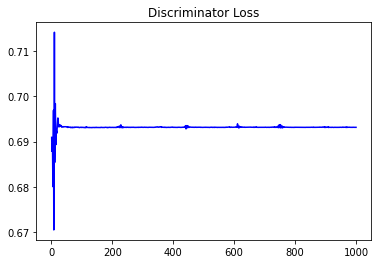

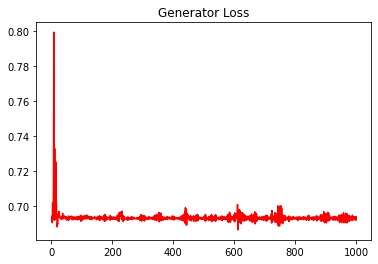

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13241026962125158


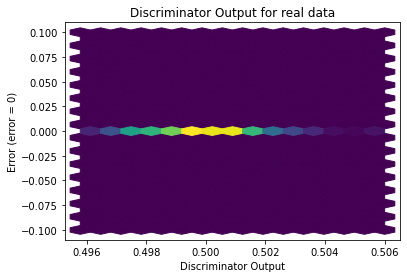

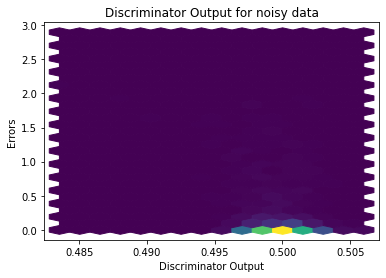

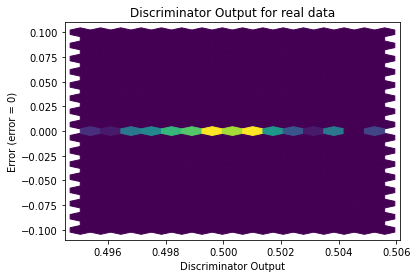

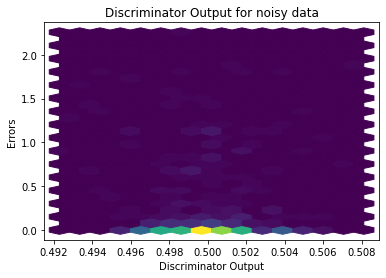

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


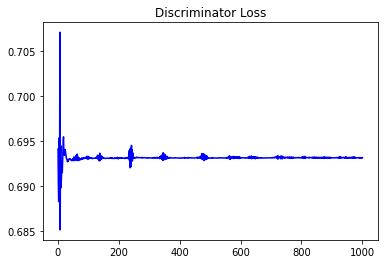

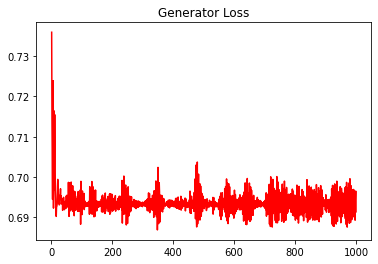

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1129997608087928


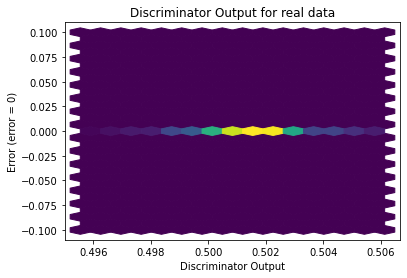

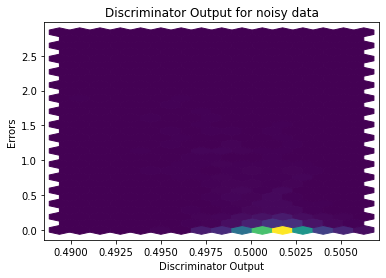

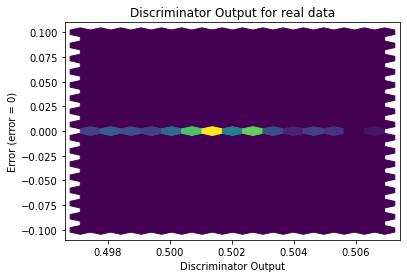

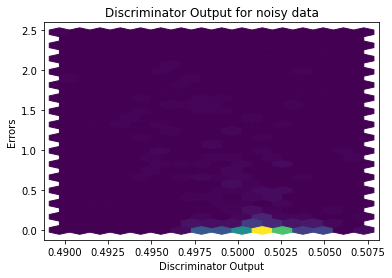

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2488]], requires_grad=True)
